In [3]:
from Equivariant_QCNN.Result.models.QCNN_circuit import QCNN
from Equivariant_QCNN.data.data import data_load_and_process
import Equivariant_QCNN.Result.models.utils.embedding as embedding
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from Equivariant_QCNN.training.Training import circuit_training
from Equivariant_QCNN.benchmarking.Benchmarking import accuracy_test, round_predictions_f
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import h5py

In [ ]:
def electron_photon():
    file_path_electron = "/home/lazaror/quantum/pruebas/Takhur_QCNN/Equivariant_QCNN/hep_data/electron.hdf5"
    with h5py.File(file_path_electron, "r") as file:
        X_e = np.array(file["X"])
        y_e = np.array(file["y"])

    file_path_photon = "/home/lazaror/quantum/pruebas/Takhur_QCNN/Equivariant_QCNN/hep_data/photon.hdf5"
    with h5py.File(file_path_photon, "r") as file:
        X_p = np.array(file["X"])
        y_p = np.array(file["y"])

    # Combinar los datos de electrones y fotones
    X = np.concatenate((X_e, X_p), axis=0)
    y = np.concatenate((y_e, y_p), axis=0)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Convertir los datos a tensores de TensorFlow
    X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
    X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
    Y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
    Y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_train: {Y_train.shape}")
    print(f"Shape of y_test: {Y_test.shape}")

    return X_train, X_test, Y_train, Y_test 


In [4]:
file_path_electron = "/home/lazaror/quantum/pruebas/Takhur_QCNN/Equivariant_QCNN/hep_data/electron.hdf5"
with h5py.File(file_path_electron, "r") as file:
    X_e = np.array(file["X"])
    y_e = np.array(file["y"])

X_e[0]

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       ...,

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]], dtype=float32)

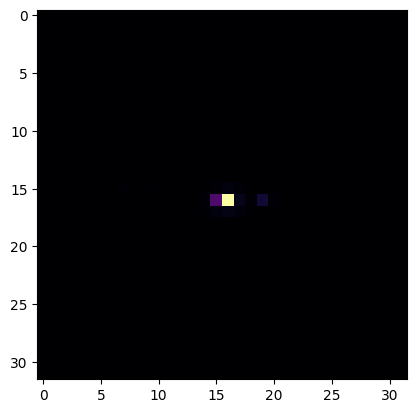

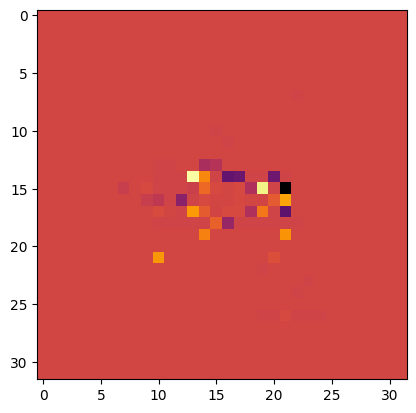

In [20]:
plt.imshow(X_e[0][:,:,0], cmap = "inferno"), 
plt.show()
plt.imshow(X_e[0][:,:,1], cmap = "inferno")
plt.show()